### Handwritten digits classification using neural network

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train), len(X_test)

(60000, 10000)

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

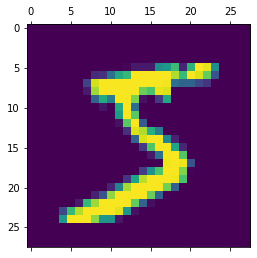

In [6]:
plt.matshow(X_train[0])
plt.show()

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# Scaling X_train and X_test
X_train = X_train/255;
X_test = X_test/255;

In [9]:
# Flatenning X_train and X_test
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

## Creating Model

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    # Output class is categorical
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4882 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3065 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2858 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2749 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.9258


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2726 - accuracy: 0.9234


[0.27257952094078064, 0.9233999848365784]

In [13]:
y_predicted = model.predict(X_test_flattened)
y_predicted

array([[1.3191938e-05, 1.5669480e-10, 3.0386471e-05, ..., 6.7398864e-01,
        8.1974722e-05, 1.5979409e-03],
       [1.5971065e-04, 1.7351384e-06, 3.2241642e-01, ..., 3.7553611e-16,
        3.4975314e-05, 3.2239939e-13],
       [1.4323954e-06, 4.8694396e-01, 6.0696304e-03, ..., 8.6677074e-04,
        2.7235448e-03, 2.9125810e-04],
       ...,
       [2.5745753e-11, 4.2755285e-11, 8.6678886e-09, ..., 3.3318706e-06,
        1.3334882e-05, 1.0887658e-04],
       [9.0416572e-09, 3.5852032e-08, 1.3614413e-08, ..., 3.7381733e-09,
        2.9256940e-04, 3.2189575e-08],
       [3.0417535e-08, 1.8630932e-15, 7.0284267e-07, ..., 8.0634528e-14,
        9.9882880e-10, 1.9850909e-12]], dtype=float32)

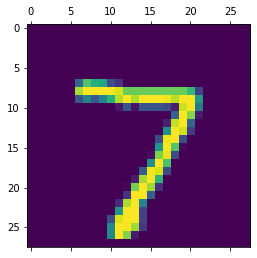

In [14]:
plt.matshow(X_test[0])
plt.show()

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels = [np.argmax(y) for y in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [17]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    5,   10,    2,    1,    0],
       [   0, 1114,    2,    2,    0,    1,    4,    2,   10,    0],
       [   8,   13,  901,   25,    7,    4,   13,   11,   45,    5],
       [   3,    0,   10,  931,    0,   18,    3,   10,   24,   11],
       [   1,    2,    3,    1,  897,    0,   14,    4,    7,   53],
       [   9,    3,    2,   46,    9,  752,   19,    7,   37,    8],
       [   8,    3,    2,    2,    7,    6,  925,    2,    3,    0],
       [   1,    6,   20,    6,    6,    0,    0,  935,    4,   50],
       [   6,    9,    5,   19,    9,   18,   10,    8,  877,   13],
       [  10,    7,    1,   11,   17,    3,    0,   11,    7,  942]],
      dtype=int32)>

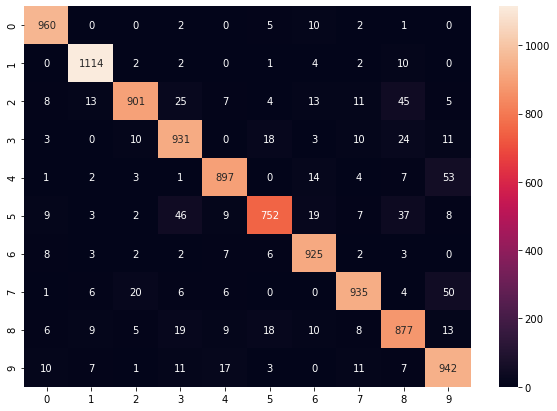

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 7))
plt.xlabel('predicted')
plt.ylabel('Truth')
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Using hidden layers

In [19]:
models = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2630 - accuracy: 0.9276
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2594 - accuracy: 0.9278
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2551 - accuracy: 0.9303
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2525 - accuracy: 0.9307
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2503 - accuracy: 0.9309


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2635 - accuracy: 0.9280


[0.26352137327194214, 0.9279999732971191]

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(y) for y in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1103,    4,    2,    0,    1,    3,    2,   20,    0],
       [   8,    7,  929,   14,    7,    3,   11,    9,   41,    3],
       [   3,    0,   16,  930,    1,   18,    1,   10,   25,    6],
       [   2,    1,    5,    1,  915,    0,    6,    4,   12,   36],
       [  10,    2,    3,   42,    8,  770,   11,    7,   32,    7],
       [  15,    3,    7,    1,    7,   14,  907,    1,    3,    0],
       [   2,    6,   22,    9,    8,    1,    0,  949,    5,   26],
       [   8,    5,    5,   21,    9,   19,    6,    8,  885,    8],
       [  10,    6,    1,    9,   22,    6,    0,   19,   12,  924]],
      dtype=int32)>

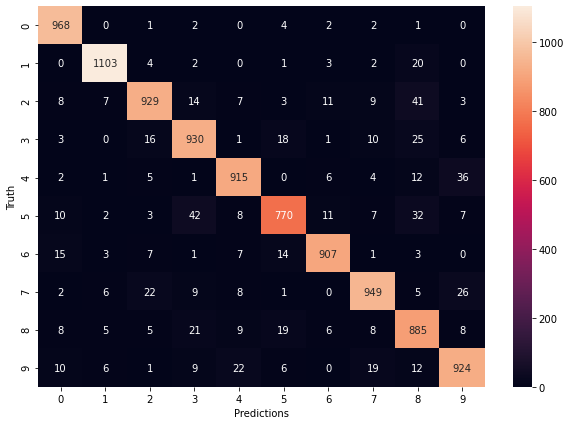

In [22]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')
plt.show()

In [23]:
# Using Flatten layer so that we don't have to call .reshape on input dataset
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2916 - accuracy: 0.9189
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1320 - accuracy: 0.9613
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0941 - accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0719 - accuracy: 0.9785
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0586 - accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0464 - accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0396 - accuracy: 0.9875
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0323 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0266 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0757 - accuracy: 0.9778


[0.0757252648472786, 0.9778000116348267]

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(y) for y in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    0,    0,    0,    3,    1,    4,    0],
       [   0, 1124,    3,    1,    0,    1,    2,    1,    3,    0],
       [   5,    0, 1010,    2,    4,    0,    2,    5,    4,    0],
       [   0,    0,    8,  984,    0,    5,    0,    4,    5,    4],
       [   1,    1,    0,    1,  962,    0,    7,    2,    0,    8],
       [   2,    0,    2,    8,    1,  866,    6,    0,    6,    1],
       [   6,    2,    2,    1,    7,    3,  935,    0,    2,    0],
       [   0,    2,   15,    0,    1,    0,    0, 1001,    4,    5],
       [   5,    0,    6,    2,    4,    1,    2,    3,  947,    4],
       [   1,    2,    0,    5,    9,    1,    0,    7,    5,  979]],
      dtype=int32)>

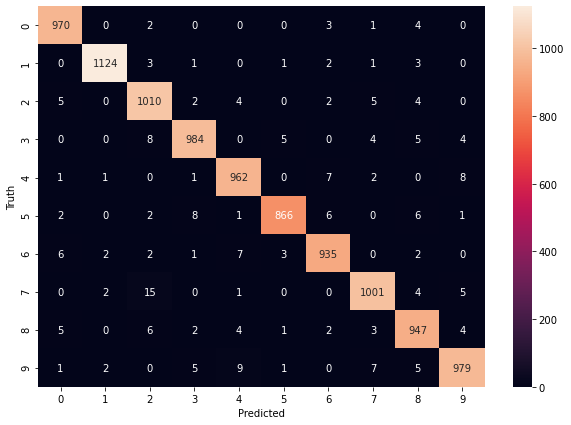

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Using softmax as last layer activation fun

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2591 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1113 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0797 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0602 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0492 - accuracy: 0.9841


In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0946 - accuracy: 0.9723


[0.09455497562885284, 0.9722999930381775]

In [31]:
model.save("digits_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: digits_model/assets
